**はじめに**

機械学習は勉強することが多いです。<br>機械学習の理論、統計学、数学<br>
勉強を通して課題に取り組むわけですが、何をしているのか見失ってしまうという相談を受けることが多いです。<br>
そこで、私自身が大切にしていることをお伝えします。<br>
それは自分が何をしたいのかを決めることです。

### 自分が何をしたいのかを決める

機械学習の課題の結論は決まって、**予測をする**です。<br>決めることは2つです。<br>
1. その対象となるものが、最終的にどういう結果であると良いかということを自分で決めましょう。
2. どんなモデルを作れたら良いかやモデルをどのように使うかを自分で決めましょう。

決められない場合は、まずは決められるように勉強をしましょう。<br>例えば、買うか買わないかの予測をする課題を与えられた時に、<br>-買うも買わないも上手に予測を当てたいということ<br>-買わない人も含めていいから、絶対買う人の予測を外したくないということ<br>-買う予測の精度を絶対に上げたいということ<br>では、目標とするゴールが異なります。<br>合わせて、この逆の最悪の状況も考えておくべきです。こういう予測ではよくないということです。<br>そして、作ったモデルが説明可能な予測をするものなのかや<br>とにかく精度の高いモデルを作るということではモデルの作り方も選択も違います。<br>これらを意識するだけで、大きく変わります。<br>もちろん、私自身も必ず意識していることです。

1.　その対象となるものが、最終的にどういう結果であると良いかということを自分で決めましょう。

評価指標の理解をしておきましょう。私自身、いくつもある機械学習の流れで一番大切にしているところです。<br>それがなければ、作ったものを本当に評価をすることはできません。<br>Accuracyだから100になるようにするではなく、きちんとAccucayの理解をしましょう。<br>理解があれば、必要に応じて自分で他の評価指標を用いて検証してみるということができます。

2.　どんなモデルを作れたら良いかやモデルをどのように使うかを自分で決めましょう。

初心者のうちは簡単な回帰と分類を使うということをお伝えします。<br>それはどんなモデルかを正しく理解していただきたいからです。<br>私自身、その後は様々なモデルに取り組んでもらいたいと思っています。<br>そして、色々なモデルを使えるようになると良いを思っています。<br>例えば、決定木モデルを使って必ず説明可能なモデルを作りプレゼンをするや、勾配ブースティングを使って高スコアのモデルを作りアジャイルなビジネスプロセスの意思決定に繋げる<br>このように用途や求めるものによって使い分けが必要性があるからです。

自分が何をしたいのかを決める。<br>多くの方が機械学習を自分の実現したいことの手助けになるようにしてもらいたいです。<br>では、機械学習のチュートリアルに取り掛かりましょう。

# タイタニックのデータセットを用いた機械学習入門

機械学習とは、人間が自然に行う学習能力をコンピュータにも実装しようとする一連の技術のことを指します。<br>これにより、コンピュータは与えられたデータから有益な情報を抽出し、その情報を元に予測や決定を行うことができます。

機械学習の入門として、非常に有名で、様々な方法論が試されてきた「タイタニックのデータセット」を用いてみます。<br>タイタニックのデータセットは、1912年に起きたタイタニック号の沈没事故の乗客データを集めたもので、その中には乗客の年齢や性別、クラス（船内での階級）など様々な特徴量が含まれています。そして、その乗客が生存したか否かという情報が含まれているため、これを用いて生存者の予測モデルを作ることが可能です。

このような実世界の問題を通じて、機械学習の基本的なステップを学びます。具体的には、データの取得から始め、探索的データ分析（EDA）によりデータセットを理解し、特徴量エンジニアリングを行って有用な特徴を抽出し、最終的に機械学習モデルを作成し評価します。

それでは一緒に学びましょう！

<br>機械学習の実装までの大まか流れは下記の通りです。<br>
| プロセス | プロセスでやること | 主なライブラリ |
|----------|------------------|-------------|
| データ取得 | 必要なデータセットを収集する | Pandas |
| 探索的データ分析（EDA） | データ集計・可視化などを通してデータセットにどんな特徴があるのか把握する | Pandas, Matplotlib |
| 特徴量エンジニアリング | 機械学習モデルの予測精度向上に有用なカラム（特徴）を抽出・加工する | Pandas |
| モデル | 問題に適した機械学習アルゴリズムを選択し、機械学習のモデル作成をする | Scikit-learn |
| モデル評価 | 構築したモデルの性能を評価する | Scikit-learn, Matplotlib |


## データ取得

In [76]:
# 使用するライブラリのインポート

## データの読み込み、集計と加工をするライブラリ
import numpy as np
import pandas as pd

## データを可視化するライブラリ
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

## 警告文を出力しないようにする
import warnings
warnings.simplefilter('ignore')

In [93]:
# 使用するデータの読み込み
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
sample_submission = pd.read_csv("./sample_submission.csv")

In [78]:
# trainのデータの中身を確認
train.head()

,ID,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,3,1,3,female,26.0,0,0,7.9250,S
2,4,1,1,female,35.0,1,0,53.1000,S
3,5,0,3,male,35.0,0,0,8.0500,S
4,7,0,1,male,54.0,0,0,51.8625,S


In [79]:
train.shape

(668, 9)

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        668 non-null    int64  
 1   survived  668 non-null    int64  
 2   pclass    668 non-null    int64  
 3   sex       668 non-null    object 
 4   age       535 non-null    float64
 5   sibsp     668 non-null    int64  
 6   parch     668 non-null    int64  
 7   fare      668 non-null    float64
 8   embarked  666 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 47.1+ KB


In [81]:
# testのデータを確認
test.head()

,ID,pclass,sex,age,sibsp,parch,fare,embarked
0,2,1,female,38.0,1,0,71.2833,C
1,6,3,male,NaN,0,0,8.4583,Q
2,9,3,female,27.0,0,2,11.1333,S
3,11,3,female,4.0,1,1,16.7000,S
4,15,3,female,14.0,0,0,7.8542,S


In [82]:
test.shape

(223, 8)

In [83]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        223 non-null    int64  
 1   pclass    223 non-null    int64  
 2   sex       223 non-null    object 
 3   age       179 non-null    float64
 4   sibsp     223 non-null    int64  
 5   parch     223 non-null    int64  
 6   fare      223 non-null    float64
 7   embarked  223 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 14.1+ KB


train（9列）とtest（8列）の列の長さが異なります。<br>trainには**survived**の列があり、testにはありません。<br>この課題は本来testにあるsurvivedの列の値を予測しようという内容です。

In [84]:
# sample_submissionのデータを確認
sample_submission.head()

,ID,survived
0,2,0
1,6,0
2,9,0
3,11,0
4,15,0


In [85]:
print(f'IDの個数は{sample_submission.shape[0]}個あります')

IDの個数は223個あります


sample_submissionにはIDとsurvivedの列があります。<br>ID列はtestのID列と一致しています。<br>survived列は全ての値が0になっています。<br>この0は仮の数値です。<br>今回の予測は223個のIDそれぞれのsurvivedが0もしくは1であることを予測しましょう。<br>0が死亡,1が生還です。

機械学習において予測する変数を**目的変数**<br>予測するために利用する変数を**説明変数**と呼びます。<br>今回の場合、survivedが目的変数。それ以外が説明変数となります。<br>私たちが行うことは説明変数を用いて目的変数を予測するということです。<br>よく出てくる単語ですので覚えておきましょう。

試しに、このファイルをそのままキノクエストに提出してみましょう。<br>すると0.5という数字が返ってきます。これがあなたのスコアです。<br>今回はAUCという評価指標を用いて0.5という数値が返ってきます。<br>AUCは簡単にいうと0から1までの値を取り、1に近づくほど精度が良い、すなわちスコアが高いと言えます。<br>精度の高い予測をすることが必要なため、スコアを大きくする、できるだけ1に近づけるということを求められています。

では、ここからtrainとtestを用いて、testのID列ごとにsurvivedが0か1かを予測する機械学習モデルを作成しましょう。<br>最後に予測値を出し、全て0であるsample_submissionのsurvived列に置き換えてキノクエストに提出しましょう。<br>ここから機械学習モデルを作成していきます。<br>ポイントは大きく２つです。<br>**1.　どんなデータであるかを把握する**<br>**2.　予測に影響を与えるデータや特徴を見つける**<br>専門用語でEDA(探索的データ分析)や特徴量エンジニアリングと呼びます。

### どんなデータであるかを把握する

データの把握をするポイントとしては<br>1. 実際にデータの中身を確認する<br>2. データの大きさと型を確認する<br>3. データの欠損を確認する<br>4. 外れ値を確認する <br>5. 相関関係を確認する<br>これらの確認は必要不可欠です。機械学習だけではなくデータ分析を行う場合にも同様です。<br>必ず行うように徹底しましょう。

<br>1. 実際にデータの中身を確認する<br>2. データの大きさと型を確認する<br>3. データの欠損を確認する

In [86]:
# 改めてtrainのデータを確認
# 全てのデータを見ることが望ましいが、最初の5行で全体像を掴みます
train.head()

,ID,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,3,1,3,female,26.0,0,0,7.9250,S
2,4,1,1,female,35.0,1,0,53.1000,S
3,5,0,3,male,35.0,0,0,8.0500,S
4,7,0,1,male,54.0,0,0,51.8625,S


In [87]:
# trainのデータの大きさを確認
train.shape

(668, 9)

In [88]:
# データの型を確認
train.dtypes

ID            int64
survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

機械学習のモデルとして扱うためには、基本的にデータは数値(int, float)でなければいけません。<br>(数値である必要がない場合もありますが基本は数値と覚えておきましょう)<br>今回のデータではsex, embarkedが文字列というobjectの型です。<br>機械学習モデルに組み込む場合は何らかの処理を施して数値にする必要があります。

In [14]:
# データの型を確認。infoメソッドを使うと多くの情報を一度に確認できます。
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        668 non-null    int64  
 1   survived  668 non-null    int64  
 2   pclass    668 non-null    int64  
 3   sex       668 non-null    object 
 4   age       535 non-null    float64
 5   sibsp     668 non-null    int64  
 6   parch     668 non-null    int64  
 7   fare      668 non-null    float64
 8   embarked  666 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 47.1+ KB


加えて、数値のデータを**量的変数**。<br>量的変数以外の数値やオブジェクト（文字列）のデータを**質的変数**と呼びます。

<br>量的変数：<br>数値で表され、変数は、算術演算（加算、減算、乗算、除算）が意味を持つため、平均、中央値、標準偏差などの統計的な計算を行うことができます。例えば、人の身長、体重、年齢などは量的変数です。

質的変数：<br>変数は数値で表されることもありますが、その数値自体には実質的な意味はありません。大小関係はありません。つまり、算術演算は通常、意味をなさないか、誤解を招く可能性があります。例えば、性別（男性、女性）、血液型（A型、B型、O型、AB型）、好きな色（赤、青、緑、黄色）などは質的変数です。<br>回答者の職業を数値でエンコードすることがあります。例えば、「1」は医師、「2」はエンジニア、「3」は教師、といった具体的な職業を表すことができます。しかし、これらの数値は単にカテゴリを表すだけで、算術的な意味を持たないため、質的変数として扱われます。

今回の列の場合はこのように分けられます。<br>
| 列名    | タイプ         | 変数の意味                                       |
|-----------|--------------|---------------------------------------------------|
| survived   | 質的変数  | 生存者(1)または死亡者(0)を表すフラグ     |
| ID | 量的変数 | 識別子  （インデックスとして使用）                       |
| pclass     | 量的変数  | 客室のクラス（1: 上等クラス、2: 中等クラス、3: 下等クラス）|
| sex        | 質的変数  | 性別（male: 男性、female: 女性）             |
| age        | 量的変数 | 年齢（乗客の年齢）                           |
| sibsp      | 量的変数 | 一緒に乗船していた兄弟/配偶者の数   |
| parch      | 量的変数 |一緒に乗船していた親/子供の数  |
| fare       | 量的変数 | 運賃（乗船料金）                                   |
| embarked   | 質的変数  | 乗船した港（乗船した港のイニシャル：C, Q, S） |


<br>もう一つ、押さえておく必要があることがあります。<br>それは特徴尺度です。<br>特徴尺度は、データの特性を表すために使用される概念で、以下の4つの基本タイプがあります。

| 特徴尺度の分類 | 説明 | 例 |
|--------------|------------|-----|
| 名義尺度 | 分類のみを行い、順序や量的な差が存在しない。 | 性別、国籍 |
| 順序尺度 | カテゴリ間に順序関係（ランク）が存在する。しかし、その間隔は一定ではない。 | 満足度のレベル（「大変満足」「満足」「普通」「不満足」） |
| 間隔尺度 | 項目間の距離に意味があるが、絶対ゼロ点が存在しない。 | 年月、温度（摂氏） |
| 比例尺度 | 絶対ゼロ点が存在し、比率が意味を持つ。名義尺度、順序尺度、間隔尺度のすべての特性を含む。 | 身長、重量、年齢 |

<br>特徴尺度を理解しておくことは重要です。<br>なぜなら、それはデータの解析と解釈をどのように進めるべきか、何を計算できるか、どの種類の統計モデルや機械学習アルゴリズムが適用可能かを決定するための基本的な情報を提供するからです。以下にいくつか具体的な理由を示します。

1. 適切な分析手法の選択:<br>　データ分析手法の選択に影響します。<br>　例えば、名義尺度のデータでは順序や大小の比較はできないため、平均や標準偏差の計算などが不適切です。一方で、比例尺度のデータでは、平均、標準偏差、回帰分析などが適用可能です。

2. 適切な統計的解釈:<br>　得られた結果の適切な解釈にも影響します。<br>　例えば、名義尺度では各カテゴリの頻度や割合の計算が可能で、比例尺度では中央値や四分位数の計算が可能となります。

3. 適切なデータの前処理:<br>　データの前処理手法も変わります。<br>　例えば、名義尺度のカテゴリ変数はOne-hotエンコーディング（またはラベルエンコーディング）によって数値に変換されます。一方、順序尺度のデータは順序エンコーディングが可能です。

4. 機械学習モデルの選択と評価:<br>　どの種類の機械学習モデルがデータに適しているか、またその評価方法を決定します。<br>　例えば、名義尺度の目的変数を持つデータセットでは分類モデルが適切であり、比例尺度の目的変数を持つデータセットでは回帰モデルが適切となります。

したがって、データの特徴尺度を理解しておくことは、<br>データの探索、前処理、分析、モデリングの各段階で非常に重要です。

<br>名義尺度のカテゴリ変数をラベルエンコーディングした際に、機械学習モデルが順序を学習してしまうという問題は、具体的には、モデルがエンコーディングされた数値に対して意味のある順序や距離を誤って推定してしまう可能性があるということを指しています。<br>

<br>例えば、["Red", "Blue", "Green"]で、これをラベルエンコーディングで[1, 2, 3]に変換したとします。<br>これらのカテゴリには順序がなく、"Red"は"Blue"や"Green"よりも"上"でも"下"でもありません。<br>しかし、もしこれらを線形回帰のようなモデルに入力すると、モデルは"Blue"が"Red"よりも"大きい"ことや、"Green"が"Blue"よりも"大きい"ことを暗に学習してしまいます。<br>これは本来存在しない順序関係をモデルが誤って学習してしまうという問題です。<br>
<br>したがって、名義尺度のカテゴリ変数に対しては、One-hotエンコーディングのように、各カテゴリが互いに等しく、かつ独立していることを明示的に表現できるエンコーディング手法を用いるべきです。<br>

ただし、決定木や木構造の一部のモデルでは、ラベルエンコーディングを行った変数を適切に扱うことが可能です。<br>これらのモデルは、変数の順序や距離を直接的には学習しないため、名義尺度のカテゴリ変数をラベルエンコーディングしても問題ないことが多いです。

<br>上記をもとにタイタニックのデータの特徴尺度を示してみましょう。

| 列名    | 特徴尺度         | 変数の意味                                       |
|-----------|--------------|---------------------------------------------------|
| survived   | 名義尺度  | 生存者(1)または死亡者(0)を表すフラグ     |
| ID | 名義尺度 | 識別子  （インデックスとして使用）                       |
| pclass     | 順序尺度  | 客室のクラス（1: 上等クラス、2: 中等クラス、3: 下等クラス）|
| sex        | 名義尺度  | 性別（male: 男性、female: 女性）             |
| age        | 比例尺度 | 年齢（乗客の年齢）                           |
| sibsp      | 比例尺度 | 一緒に乗船していた兄弟/配偶者の数   |
| parch      | 比例尺度 |一緒に乗船していた親/子供の数  |
| fare       | 比例尺度 | 運賃（乗船料金）                                   |
| embarked   | 名義尺度  | 乗船した港（乗船した港のイニシャル：C, Q, S） |

<br>以上より、次のようにまとめました。<br>今回予測する目的変数survivedは名義尺度であるため、分類モデルが適切であることがわかります。<br>IDはインデックスとして使用する名義尺度のため、データに意味を持たないと判断をし機械学習モデルの特徴として使いません。<br>pclassは順序尺度です。順序は十分な特徴として使えるため何かヒントを得られるかよくデータを観察しましょう。<br>sexは名義尺度です。0,1に数値変換することにします。2つのカテゴリーを持つ変数（バイナリ変数）を「male」を0、「female」を1に変換した場合、これは技術的にラベルエンコーディングとなりますが、この場合、"0<1"という順序関係が導入されることは少ないです。<br>ageからfareは比例尺度、embarkedは名義尺度です。embarkedをそのまま特徴として使う場合は、One-hotエンコーディングを用いましょう。

<br>次に、欠損値の確認をします。

In [15]:
# 欠損値の確認
train.isnull().sum()

ID            0
survived      0
pclass        0
sex           0
age         133
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

機械学習のモデルとして扱うためには、基本的に欠損値があってはいけません。<br>(欠損値があっても問題が無い場合もあります)<br>今回はage 133個とembarked 2個の欠損値があります<br>そのため、これらに対して何らかの処理を行う必要があります。

testのデータについても同様の確認を行いましょう。

In [16]:
# 改めてtestのデータを確認
# 全てのデータを見ることが望ましいが、最初の5行で全体像を掴みます
test.head()

,ID,pclass,sex,age,sibsp,parch,fare,embarked
0,2,1,female,38.0,1,0,71.2833,C
1,6,3,male,NaN,0,0,8.4583,Q
2,9,3,female,27.0,0,2,11.1333,S
3,11,3,female,4.0,1,1,16.7000,S
4,15,3,female,14.0,0,0,7.8542,S


In [17]:
# testのデータの大きさを確認
test.shape

(223, 8)

In [18]:
# データの型を確認
test.dtypes

ID            int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

trainと同じくsex, embarkedが文字列というobjectの型です。

In [19]:
# データの型を確認。infoメソッドを使うと多くの情報を一度に確認できます。
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        223 non-null    int64  
 1   pclass    223 non-null    int64  
 2   sex       223 non-null    object 
 3   age       179 non-null    float64
 4   sibsp     223 non-null    int64  
 5   parch     223 non-null    int64  
 6   fare      223 non-null    float64
 7   embarked  223 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 14.1+ KB


In [20]:
# 欠損値の確認
test.isnull().sum()

ID           0
pclass       0
sex          0
age         44
sibsp        0
parch        0
fare         0
embarked     0
dtype: int64

testはage 44個の欠損値があります。<br>今後何らかの処理を行う必要があることを認識しましょう。

Pandasのdescribeメソッドを使うと、各列についてデータを要約することができます。<br>こちらを用いると数値から外れ値を見つけることもできます。

In [91]:
# trainのデータを要約。includeの引数なしは数値のみ、"O"はobjectのみ、"all"は全てのデータを要約します
train.describe(include="all")

,ID,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,668.000000,668.000000,668.000000,668,535.000000,668.000000,668.000000,668.000000,666
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,437,NaN,NaN,NaN,NaN,490
mean,445.911677,0.386228,2.305389,NaN,29.900000,0.534431,0.392216,32.373621,NaN
std,259.966783,0.487249,0.837377,NaN,14.487993,1.161739,0.822509,50.632021,NaN
min,1.000000,0.000000,1.000000,NaN,0.670000,0.000000,0.000000,0.000000,NaN
25%,216.250000,0.000000,2.000000,NaN,21.000000,0.000000,0.000000,7.925000,NaN
50%,445.500000,0.000000,3.000000,NaN,29.000000,0.000000,0.000000,14.500000,NaN
75%,674.500000,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.275000,NaN


In [22]:
# IDとsurvivedを省いて、trainのデータを要約します
train.iloc[:,2:].describe(include="all")

,pclass,sex,age,sibsp,parch,fare,embarked
count,668.000000,668,535.000000,668.000000,668.000000,668.000000,666
unique,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,437,NaN,NaN,NaN,NaN,490
mean,2.305389,NaN,29.900000,0.534431,0.392216,32.373621,NaN
std,0.837377,NaN,14.487993,1.161739,0.822509,50.632021,NaN
min,1.000000,NaN,0.670000,0.000000,0.000000,0.000000,NaN
25%,2.000000,NaN,21.000000,0.000000,0.000000,7.925000,NaN
50%,3.000000,NaN,29.000000,0.000000,0.000000,14.500000,NaN
75%,3.000000,NaN,38.000000,1.000000,0.000000,31.275000,NaN


In [23]:
# testのデータを要約。includeの引数なしは数値のみ、"O"はobjectのみ、"all"は全てのデータを要約します
test.iloc[:,1:].describe(include="all")

,pclass,sex,age,sibsp,parch,fare,embarked
count,223.000000,223,179.000000,223.000000,223.000000,223.000000,223
unique,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,140,NaN,NaN,NaN,NaN,154
mean,2.318386,NaN,29.098715,0.488789,0.349776,31.696729,NaN
std,0.833949,NaN,14.665346,0.904747,0.755513,46.875335,NaN
min,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,2.000000,NaN,19.000000,0.000000,0.000000,7.895800,NaN
50%,3.000000,NaN,26.000000,0.000000,0.000000,13.000000,NaN
75%,3.000000,NaN,38.000000,1.000000,0.000000,30.000000,NaN


上記よりtrainとtestのデータの分布は概ね均衡であることがわかります。<br>不均衡の場合はそれを考慮して取り組みましょう。

<br>5. 相関関係を確認する

相関関係を見るために、最もよく使われるのはヒートマップです。

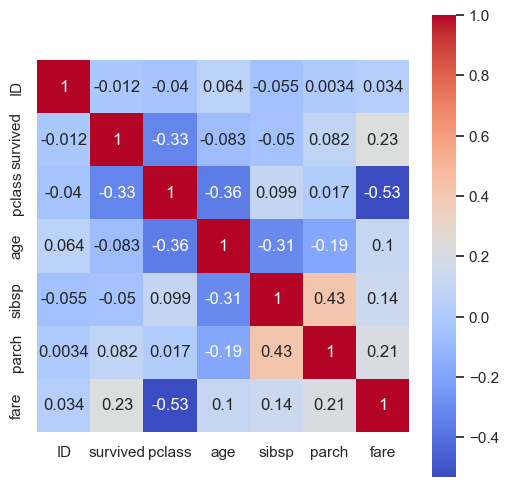

In [94]:
# ヒートマップを使って相関関係を可視化します
plt.figure(figsize=(6, 6))
sns.heatmap(train.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

<br>fareとpclassには-0.53負の相関がありそうです。<br>あくまで、参考であるというところに留めておきましょう。<br>データ分析において思い込みで判断することは危険です。<br>データをよく観察するということはこれから長い期間、データ分析や機械学習をする上で忘れずにいましょう。

<br>ペアプロットを使うとグラフで相関関係を見ることができます。

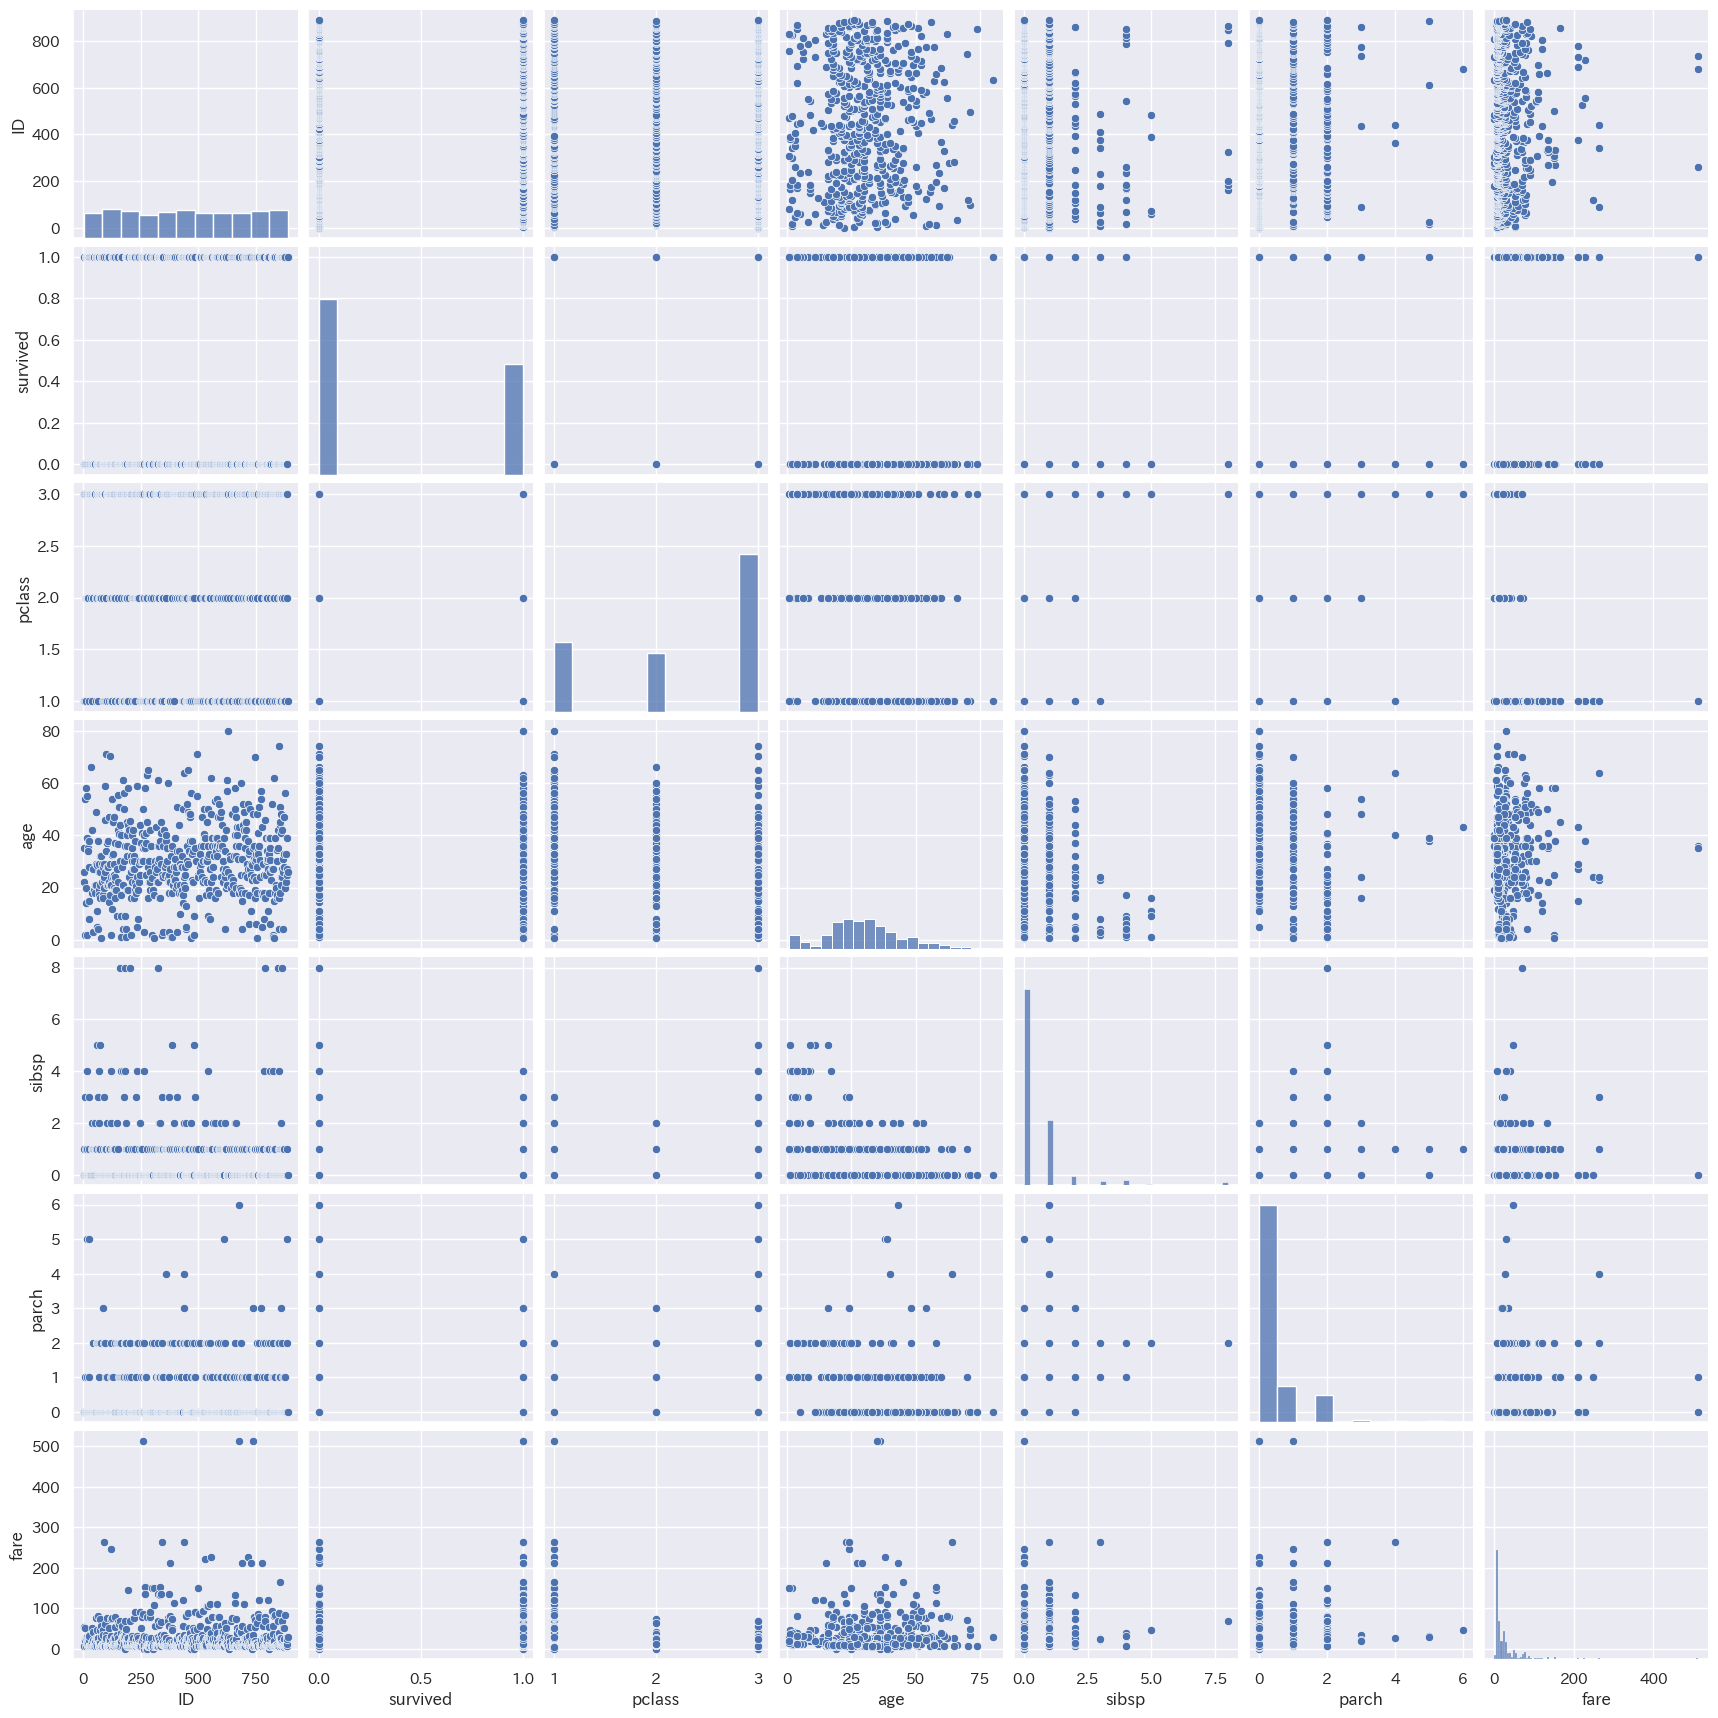

In [25]:
sns.pairplot(train)
plt.show()

<br>個々の相関を見たい場合は散布図や線形回帰プロットを描きましょう。

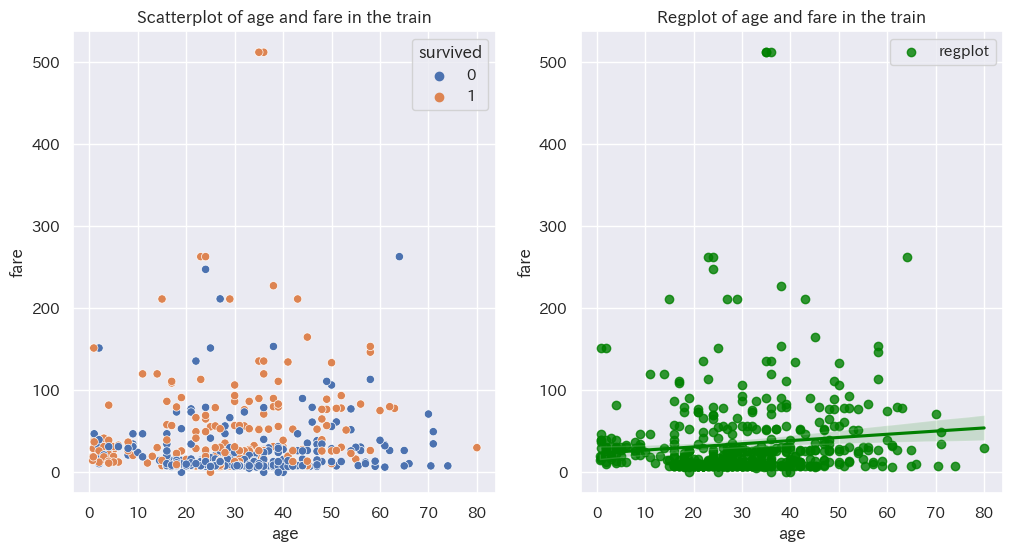

In [26]:
fig, ax = plt.subplots(1,2, figsize=(12, 6))
sns.scatterplot(x='age', y='fare', data=train, ax=ax[0], hue='survived')
ax[0].set_title('Scatterplot of age and fare in the train')

sns.regplot(x='age', y='fare', data=train, ax=ax[1], color='green')
ax[1].set_title('Regplot of age and fare in the train')

ax[0].legend(title="survived")  
ax[1].legend(labels=["regplot"]) 
plt.show()

ここまでで、どんなデータを用いた予測をするのかという大枠を把握することができました。<br>また、データの型を変換する必要と欠損値、外れ値かもしれないものに対して処理を行う必要があることがわかりました。

## EDA(探索的データ分析)と特徴量エンジニアリング

<br>ここからさらにデータを詳しく見ていきます。<br>EDA（探索的データ分析）を行い、特徴量エンジニアリングに繋げられるようにします。<br>与えられる全ての列を見なければいけません。<br>そして、データを見ながらいくつか仮説を立てます。<br>sexのmaleは0が多く、femaleは1が多いのではないか？やfareの値が高いほど1になるのではないか？といったことです。<br>データから仮説を検証し、どの列やいわゆる特徴が予測に影響を与えるのかということを意識して取り組みましょう。

#### 1. survivedについて

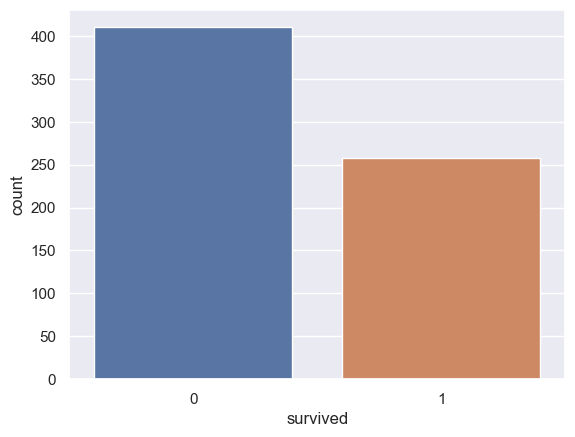

In [95]:
# trainにあるsurvivedのデータ量を可視化する
sns.countplot(x='survived', data=train)
plt.show()

In [28]:
# trainにあるsurvivedの割合を数値で可視化する
train["survived"].value_counts()/len(train["survived"])*100

0    61.377246
1    38.622754
Name: survived, dtype: float64

適当に予測するとしたら、0を多くすると約60%は正解するかもしれません

### 2. sexについて

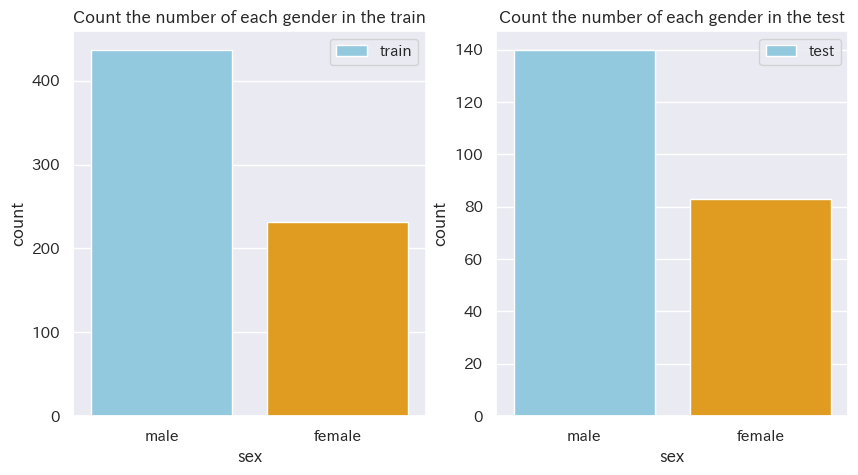

In [29]:
# trainとtestにあるsexのデータ量を可視化する
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.countplot(x='sex', data=train, ax=ax[0], palette={'male': 'skyblue', 'female': 'orange'}, order=['male', 'female'])
ax[0].set_title('Count the number of each gender in the train')

sns.countplot(x='sex', data=test, ax=ax[1],  palette={'male': 'skyblue', 'female': 'orange'},  order=['male', 'female'])
ax[1].set_title('Count the number of each gender in the test')

ax[0].legend(labels=["train"])  # Add legend for the first subplot
ax[1].legend(labels=["test"]) 
plt.show()

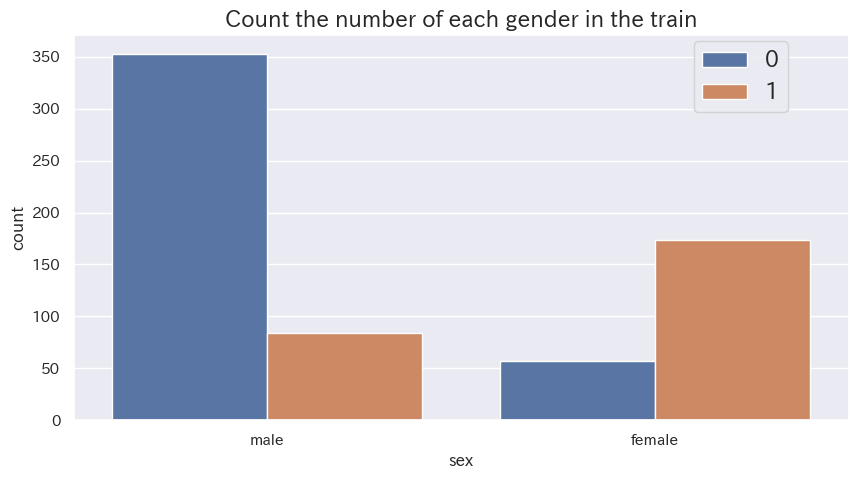

In [30]:
# trainにあるsexごとにsurvivedがどのようになっているかを可視化する
fig, ax = plt.subplots(figsize=(10, 5))  # Add this line

sns.countplot(x='sex', data=train, hue="survived", 
            order=['male', 'female'], ax=ax)  # Add "ax=ax" here

ax.set_title('Count the number of each gender in the train', fontsize=16)# Use "ax.set_title" instead of "sns.set_title"

plt.legend(loc=[0.8 , 0.8], fontsize=16)
plt.show()

#### 3. ageについて

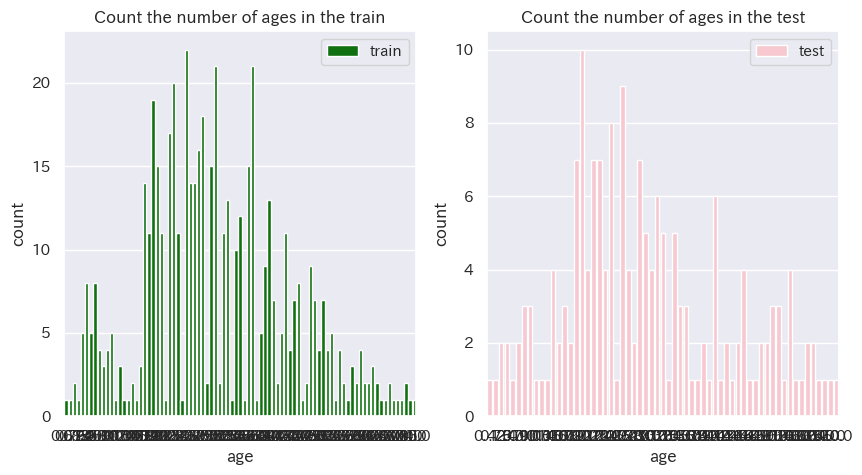

In [31]:
# trainとtestにあるsexのデータ量を可視化する
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.countplot(x='age', data=train, ax=ax[0], color="green")
ax[0].set_title('Count the number of ages in the train')

sns.countplot(x='age', data=test, ax=ax[1], color="pink")
ax[1].set_title('Count the number of ages in the test')

ax[0].legend(labels=["train"]) 
ax[1].legend(labels=["test"]) 
plt.show()

このグラフではよくわかりません。<br>年齢を5歳区切りのカテゴリに分けて可視化してみましょう。

In [32]:
# 年齢を10歳ごとのカテゴリに分割
train['age_period'] = pd.cut(train['age'], bins=range(0, 90, 5), right=False)
test['age_period'] = pd.cut(test['age'], bins=range(0, 90, 5), right=False)

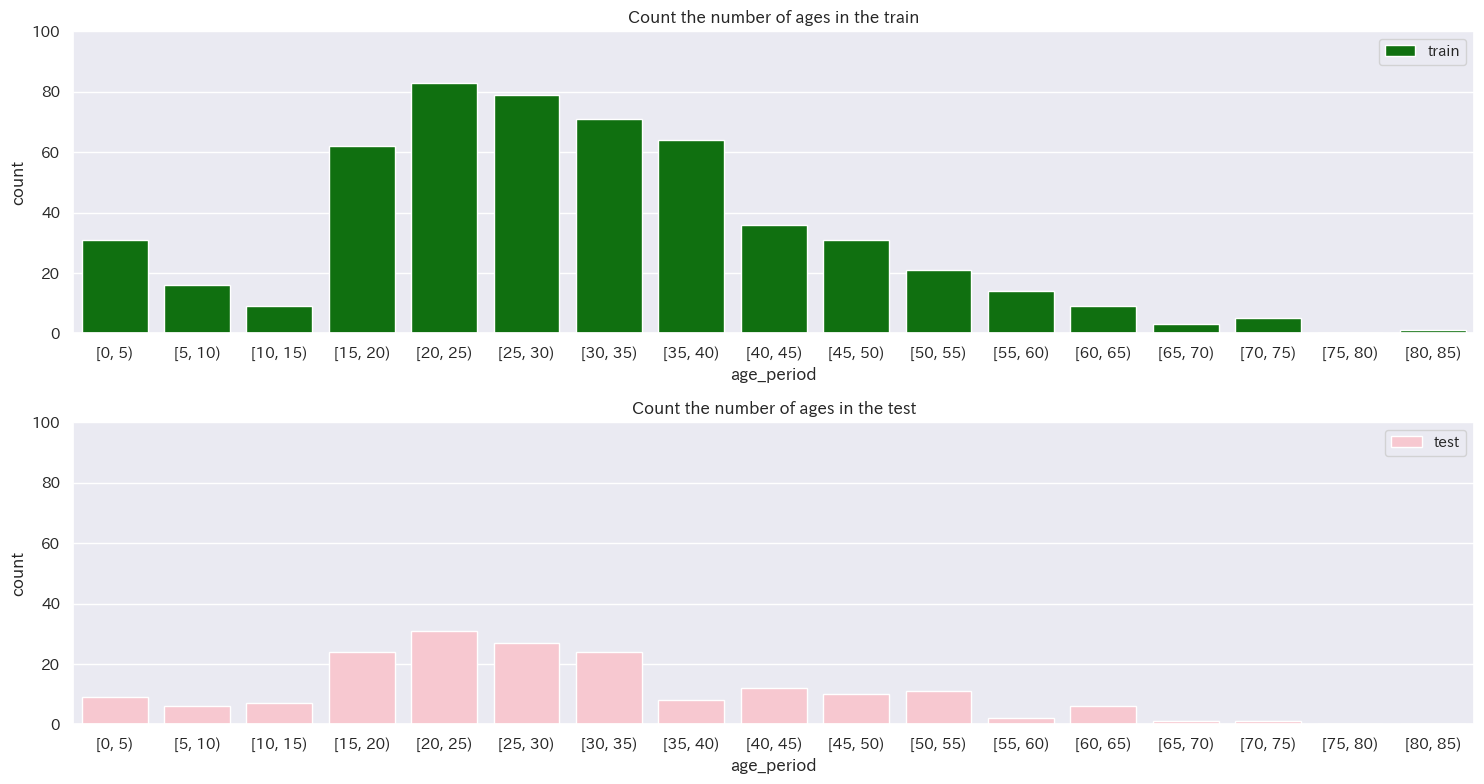

In [33]:
# trainとtestにあるsexのデータ量を可視化する
fig, ax = plt.subplots(2,1, figsize=(15, 8))
sns.countplot(x='age_period', data=train, ax=ax[0], color="green")
ax[0].set_title('Count the number of ages in the train')
ax[0].set_ylim(0, 100)

sns.countplot(x='age_period', data=test, ax=ax[1], color="pink")
ax[1].set_title('Count the number of ages in the test')
ax[1].set_ylim(0, 100)

ax[0].legend(labels=["train"]) 
ax[1].legend(labels=["test"]) 

plt.tight_layout()
plt.show()

15-40のデータが多くあるようです。<br>また、trainの0-5歳のデータ量が多いということがわかります。

#### 年齢と生存の有無に関係性はあるのか？を調べる

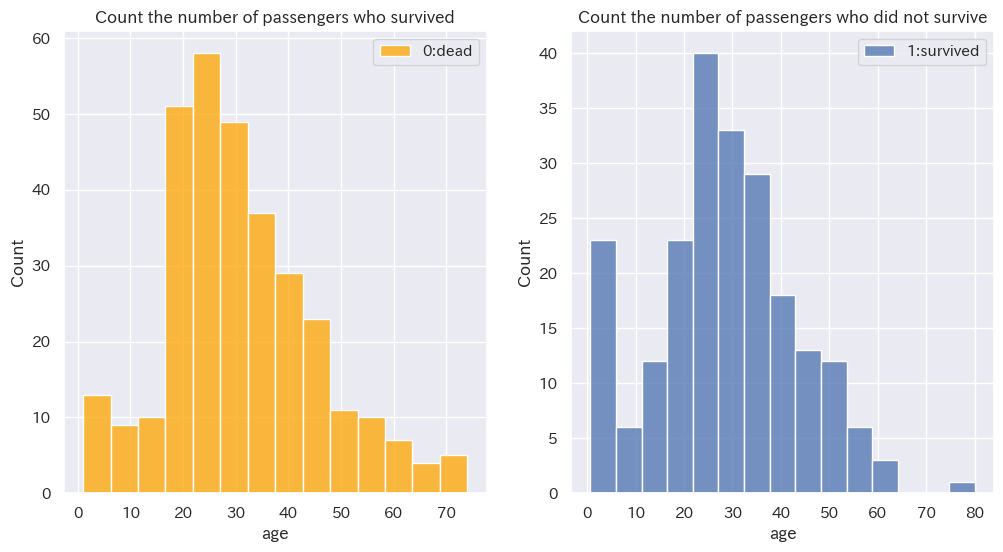

In [34]:
# trainにあるageごとにsurvivedがどのようになっているかを可視化する
fig, ax = plt.subplots(1,2, figsize=(12, 6))

sns.histplot(train[train["survived"]==0]["age"],label="survived",color="orange", ax=ax[0])
ax[0].set_title('Count the number of passengers who survived')

sns.histplot(train[train["survived"]==1]["age"],label="Dead",color="b", ax=ax[1])
ax[1].set_title('Count the number of passengers who did not survive')

ax[0].legend(labels=["0:dead"])  # Add legend for the first subplot
ax[1].legend(labels=["1:survived"]) 
plt.show()

0-5歳生存であるデータが多いです。よって、ageが0-5歳である場合と1の可能性が高くなると言えそうです。<br>特徴として使うことにします。<br>ただし、それ以外についてはあまり大きな特徴と言える部分は少ないようです<br>他の列との関連させると特徴になるかもしれません。<br>探索をしましょう。
<br>ageには欠損値が含まれていたのでその点を考慮しましょう。

In [35]:
print(f'trainのageの欠損値の割合は{round(train["age"].isnull().sum()/ len(train["age"]) * 100,2)}%です')
print(f'testのageの欠損値の割合は{round(test["age"].isnull().sum()/ len(test["age"]) * 100,2)}%です')

trainのageの欠損値の割合は19.91%です
testのageの欠損値の割合は19.73%です


欠損値の割合が19%である場合、欠損の割合が比較的高いと見なされます。<br><br>
データの信頼性: <br>
データが不足しているため、結果がバイアスを持つことがあります。<br>

予測モデルの精度: <br>
モデルが不完全なデータに基づいてトレーニングされるため、予測の信頼性が低くなります。<br><br>

欠損値を扱う方法
1. 欠損値の補完:<br>欠損値を他の方法や代替手段で埋めることが考えられます。例えば、平均値、中央値、最頻値などで補完する方法があります。
2. 欠損値を持つサンプルの削除:<br>欠損値を持つサンプルを削除する方法も考えられますが、データの量が減少し、結果の精度が低下する可能性があります。
3. 別の特徴量との関連を検討:<br>欠損値が特定の特徴量と関連している場合、他の特徴量との相関を検討して補完する方法も考えられます。

欠損値を適切に扱い、信頼性のある分析やモデル構築を行うためには、適切な欠損値処理手法を選択しましょう。

今回は単純に平均値で補完することにします。

In [96]:
train['age'] = train['age'].fillna(train['age'].mean())
test['age'] = test['age'].fillna(test['age'].mean())

In [97]:
print(train['age'].isnull().sum())

0


#### 4. pclassについて

#### 客室と生存の有無に関係性はあるのか？を調べる

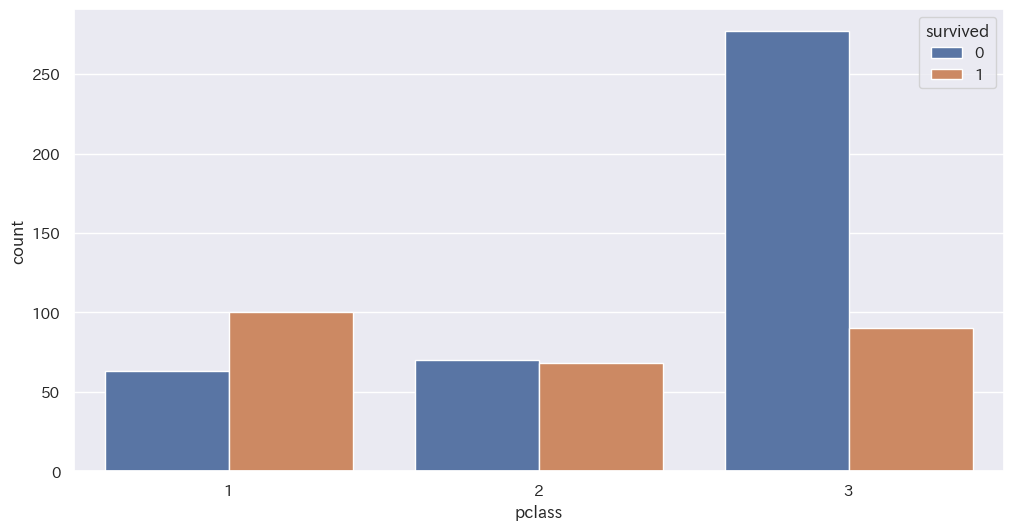

In [38]:
# countplotで可視化する
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x="pclass",hue="survived",data=train)
plt.show()

pclassの数値は次のように分類されていました。<br>（1: 上等クラス、2: 中等クラス、3: 下等クラス）<br>グラフよりpclassが3の場合、0(死亡)であることが多いようです。<br>よってこれは、特徴として十分考えられます。

#### 5. fareについて

#### 生存の有無に関係性はあるのか？を調べる

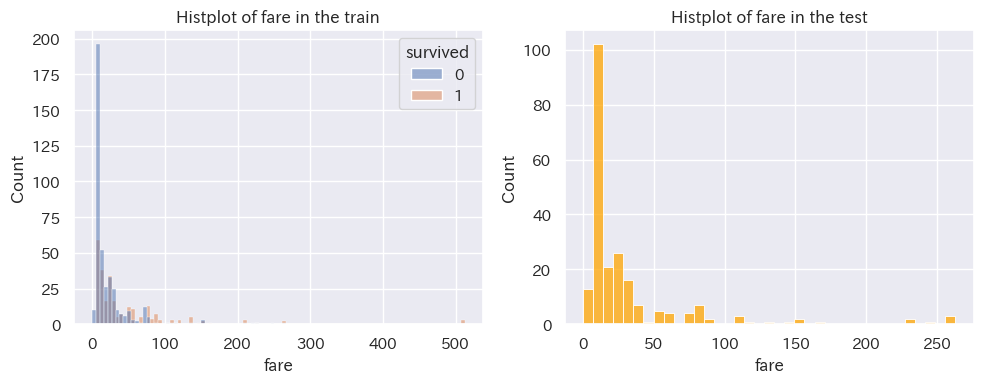

In [39]:
# histplotで可視化する
fig, ax = plt.subplots(1,2, figsize=(10, 4))

sns.histplot(x='fare', data=train, ax=ax[0], hue='survived')
ax[0].set_title('Histplot of fare in the train')

sns.histplot(x='fare', data=test, ax=ax[1], color='orange')
ax[1].set_title('Histplot of fare in the test')

plt.tight_layout()
plt.show()

運賃が安いとsurvivedが0である傾向がありそうです。

#### 6. sibsp(一緒に乗船した兄弟または配偶者の数)について

#### 生存の有無に関係性はあるのか？を調べる

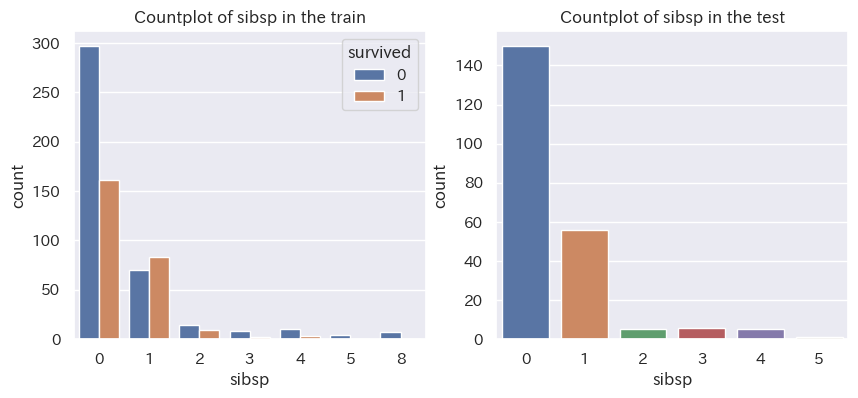

In [40]:
# countplotで可視化します
fig, ax = plt.subplots(1,2, figsize=(10, 4))
sns.countplot(x='sibsp', data=train, hue='survived', ax=ax[0]) 
ax[0].set_title('Countplot of sibsp in the train')

sns.countplot(x='sibsp', data=test, ax=ax[1]) 
ax[1].set_title('Countplot of sibsp in the test')

plt.show()

sibspが0、すなわり1人で乗っているという人が多いです。<br>1人の場合、survivedが0である可能性が高いというように考えられるかもしれません。

#### 7. parch(一緒に乗船した親または子供の数)について

#### 生存の有無に関係性はあるのか？を調べる

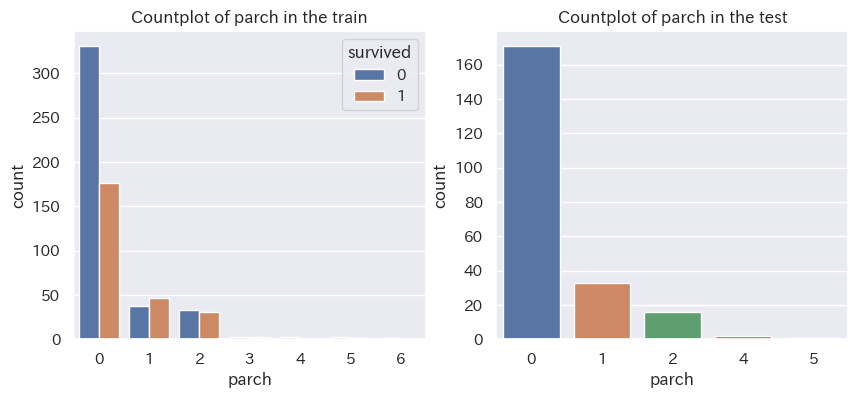

In [41]:
# countplotで可視化します
fig, ax = plt.subplots(1,2, figsize=(10, 4))
sns.countplot(x='parch', data=train, hue='survived', ax=ax[0]) 
ax[0].set_title('Countplot of parch in the train')

sns.countplot(x='parch', data=test, ax=ax[1]) 
ax[1].set_title('Countplot of parch in the test')

plt.show()

先ほどのsibsbと似たようなグラフです。<br>これらの2つの特性を組み合わせることで、各乗客が乗船時にどの程度の家族と一緒にいたかを詳しく知ることができます。<br>例えば、"sibsp" = 2かつ"parch" = 1の乗客は、2人の兄弟または配偶者と1人の親または子供と一緒に乗船したことを示します。

In [42]:
train['sibsp'] + train['parch']

0      1
1      0
2      1
3      0
4      0
      ..
663    0
664    5
665    0
666    3
667    0
Length: 668, dtype: int64

上記の数字に +1をしましょう。そうすると、乗客の世帯がわかります。<br>このデータを新しい特徴量として列に追加をしましょう。

In [98]:
train['boarding_household'] = train['sibsp'] + train['parch'] + 1
test['boarding_household'] = test['sibsp'] + test['parch'] + 1
train.head()

,ID,survived,pclass,sex,age,sibsp,parch,fare,embarked,boarding_household
0,1,0,3,male,22.0,1,0,7.2500,S,2
1,3,1,3,female,26.0,0,0,7.9250,S,1
2,4,1,1,female,35.0,1,0,53.1000,S,2
3,5,0,3,male,35.0,0,0,8.0500,S,1
4,7,0,1,male,54.0,0,0,51.8625,S,1


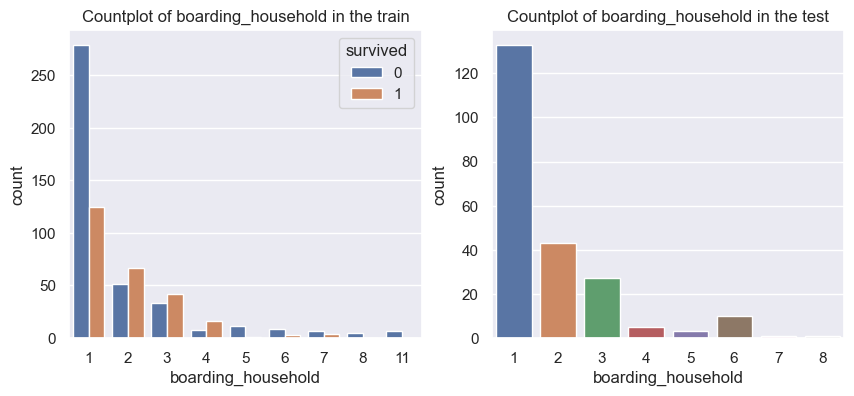

In [99]:
# countplotで可視化します
fig, ax = plt.subplots(1,2, figsize=(10, 4))
sns.countplot(x='boarding_household', data=train, hue='survived', ax=ax[0]) 
ax[0].set_title('Countplot of boarding_household in the train')

sns.countplot(x='boarding_household', data=test, ax=ax[1]) 
ax[1].set_title('Countplot of boarding_household in the test')

plt.show()

#### 8. embarkedについて

#### 生存の有無に関係性はあるのか？を調べる

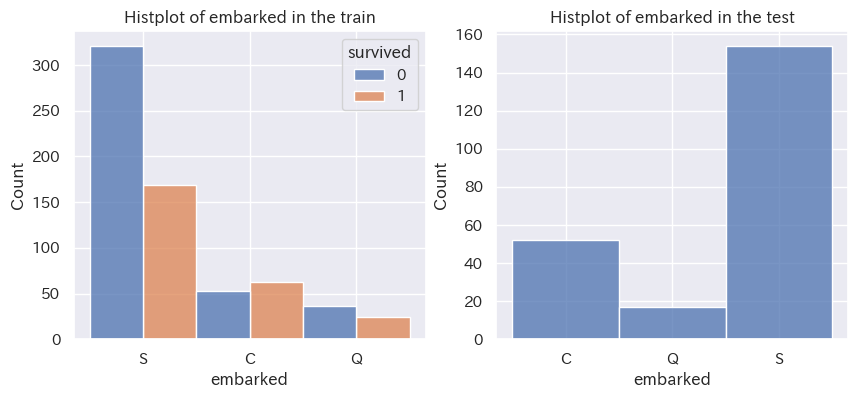

In [45]:
# histplotで可視化します
fig, ax = plt.subplots(1,2, figsize=(10, 4))
sns.histplot(x='embarked', data=train, hue='survived', ax=ax[0], multiple='dodge') #dodgeオプションを指定することでhueの重なりをずらすことができます
ax[0].set_title('Histplot of embarked in the train')

sns.histplot(x='embarked', data=test, ax=ax[1]) 
ax[1].set_title('Histplot of embarked in the test')

plt.show()

In [46]:
# 欠損値の数を確認します
print(train['embarked'].isnull().sum())
# 欠損値の割合を算出します
print(f'欠損値は全体の{round(train["embarked"].isnull().sum()/len(train["embarked"])*100,2)}%である')

2
欠損値は全体の0.3%である


embarkedには欠損値があります。<br>全体の0.3%であり、今回は削除という処理を行います。

In [163]:
import numpy as np
import pandas as pd

# データの読み込み
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

# sex
# 0と1の数値データに置き換える
train['sex'].replace({"male": 0, "female": 1}, inplace=True)
test['sex'].replace({"male": 0, "female": 1}, inplace=True)

# age
# 機械学習モデルに当てはめれるよう欠損は平均値で埋める
train['age'] = train['age'].fillna(train['age'].mean())
test['age'] = test['age'].fillna(test['age'].mean())

# pclassは処理なし

# fareは処理なし

# sibspは処理なし

# parchは処理なし

# parchとsibspで新しい特徴量を作る
train['boarding_household'] = train['sibsp'] + train['parch'] + 1
test['boarding_household'] = test['sibsp'] + test['parch'] + 1

# embarkedの欠損をデータから削除する
train.dropna(subset=["embarked"], inplace=True)
test.dropna(subset=["embarked"], inplace=True)

# embarkedを文字列から数値データにする
# ラベルエンコードするためのライブラリをインポート
from sklearn.preprocessing import LabelEncoder

# Embarked列を数値データに変換するためのLabelEncoderを作成
label_encoder = LabelEncoder()

# LabelEncoderを使ってEmbarked列を数値データに変換
train['embarked'] = label_encoder.fit_transform(train['embarked'])
test['embarked'] = label_encoder.fit_transform(test['embarked'])

In [101]:
train.head()

,ID,survived,pclass,sex,age,sibsp,parch,fare,embarked,boarding_household
0,1,0,3,0,22.0,1,0,7.2500,2,2
1,3,1,3,1,26.0,0,0,7.9250,2,1
2,4,1,1,1,35.0,1,0,53.1000,2,2
3,5,0,3,0,35.0,0,0,8.0500,2,1
4,7,0,1,0,54.0,0,0,51.8625,2,1


In [102]:
train.shape

(666, 10)

In [103]:
train.isnull().sum()

ID                    0
survived              0
pclass                0
sex                   0
age                   0
sibsp                 0
parch                 0
fare                  0
embarked              0
boarding_household    0
dtype: int64

In [49]:
test.head()

,ID,pclass,sex,age,sibsp,parch,fare,embarked,boarding_household
0,2,1,1,38.000000,1,0,71.2833,0,2
1,6,3,0,29.098715,0,0,8.4583,1,1
2,9,3,1,27.000000,0,2,11.1333,2,3
3,11,3,1,4.000000,1,1,16.7000,2,3
4,15,3,1,14.000000,0,0,7.8542,2,1


In [50]:
# 欠損値を確認
train.isnull().sum()

ID                    0
survived              0
pclass                0
sex                   0
age                   0
sibsp                 0
parch                 0
fare                  0
embarked              0
boarding_household    0
dtype: int64

In [51]:
# 欠損値を確認
test.isnull().sum()

ID                    0
pclass                0
sex                   0
age                   0
sibsp                 0
parch                 0
fare                  0
embarked              0
boarding_household    0
dtype: int64

## モデルとモデル評価

いよいよ、ここから機械学習モデルの実装に入ります。<br>まずはモデルの選定です。<br>今回は、survivedが0か1を予測します。2値分類と呼ばれるカテゴリです。<br>今回は、重回帰モデルを用いて予測を行います。

重回帰モデル：<br>
統計学や機械学習の分野で使われる予測モデルの一種です。<br>
このモデルは、複数の要因（説明変数）が結果に影響を与えると考えることで、何かを予測するために使われます。

例えば、高校生が試験の点数を予測したいと考える場合を考えてみましょう。<br>
この場合、点数は複数の要因によって影響を受ける可能性があります。<br>
例えば、勉強時間、睡眠時間、前日の体調などが点数に影響を与えるかもしれません。

重回帰モデルでは、これらの要因を数値で表現してデータを集め、それをもとにモデルを作成します。<br>
そして、モデルは$$点数 = α + β1 × 勉強時間 + β2 × 睡眠時間 + β3 × 前日の体調 + …$$のような式で表現されます。

ここで、α、β1、β2、β3などはモデルのパラメータと呼ばれるもので、これらが具体的な値になることで、実際のデータに適合した予測モデルが完成します。

そして、新たなデータ（例えば、新しい勉強時間や睡眠時間など）が与えられたときに、この重回帰モデルを使って予測を行うことができます。<br>
これによって、高校生はそのデータに基づいて将来の試験の点数を予測することができるわけです。

重回帰モデルは実生活のさまざまな問題に応用されており、複数の要因が結果にどのように影響を与えるのかを理解し、予測や意思決定に役立てるのに役立つ手法です。

まず、重回帰モデルを使った実装を行いましょう。<br>目的変数と説明変数を分割します。

In [164]:
# "ID"をindexとして指定します
train = train.set_index("ID")
test = test.set_index("ID")

# 説明変数として使わない"survived"を削除します
X = train.drop('survived', axis=1)
# 目的変数に"survived"を指定します
y = train['survived']

In [165]:
# 重回帰モデル構築
from sklearn.linear_model import LinearRegression

# 重回帰モデルを作成
model = LinearRegression()

# モデルの学習
model.fit(X, y)

LinearRegression()

上記のたった3行のコードで、機械学習モデルの構築は終わりです。<br>testデータの予測をしてみましょう。

In [166]:
pred = model.predict(test)
pred

array([ 9.25673981e-01,  1.46074460e-01,  6.18156548e-01,  7.18267409e-01,
        7.11812217e-01,  5.70641587e-01,  3.91307149e-01,  4.34710188e-01,
        9.95920047e-01,  4.73321731e-01,  1.57804551e-01,  7.38739471e-01,
        5.16123927e-01,  1.10621186e-01,  5.93110641e-02,  2.88072332e-01,
        4.29415547e-01,  2.22484912e-01,  3.03890948e-01,  1.34402673e-01,
        1.10621186e-01,  6.19724975e-01,  4.69248932e-01,  5.33102665e-01,
        1.10583502e-01,  8.80398364e-02,  6.32730082e-01,  2.78329143e-01,
        6.77641385e-01,  6.65178504e-01,  6.10898377e-01,  3.32168770e-01,
        2.78546559e-01,  1.40160242e-01,  7.35484100e-01,  1.10770872e-01,
        1.28607190e-01,  4.54059307e-01,  7.34385085e-01,  1.21267896e-01,
        3.39081861e-01,  3.69135918e-01,  1.45901362e-01,  1.17376692e-01,
        8.16863252e-02,  1.75282644e-01,  1.40082073e-01,  1.01293779e-01,
        9.76718333e-01, -1.69763787e-02,  8.75424558e-01,  1.11129097e-01,
        1.39627962e-01,  

予測は確率で表されています。


これはsurvievedが1である確率を表しています。<br>pred[0]は0.9256です。<br>およそ0.9の確率で1であるということです。<br>問題は0か1を予測する2値分類です。<br>閾値を0.5として結果を振り分けましょう。

In [118]:
# 提出用のデータを読み込みます
sample_submission = pd.read_csv("./sample_submission.csv")
sample_submission.head()

,ID,survived
0,2,0
1,6,0
2,9,0
3,11,0
4,15,0


In [119]:
# 予測する列に予測値を代入します
sample_submission['survived'] = pred
sample_submission.head()

,ID,survived
0,2,0.925674
1,6,0.146074
2,9,0.618157
3,11,0.718267
4,15,0.711812


In [120]:
# 閾値0.5で0と1に振り分けます
sample_submission['survived'] = sample_submission['survived'].apply(lambda x: 1 if x >= 0.5 else 0)
sample_submission.head()

,ID,survived
0,2,1
1,6,0
2,9,1
3,11,1
4,15,1


予測した値を実際に提出をしてみましょう

In [122]:
# csvの出力
# index列は必要がないので、Falseを指定します
sample_submission.to_csv('submission.csv', index=False)

スコアは**0.7775**でした。

どの特徴が目的変数に影響を与えているかを可視化できます。

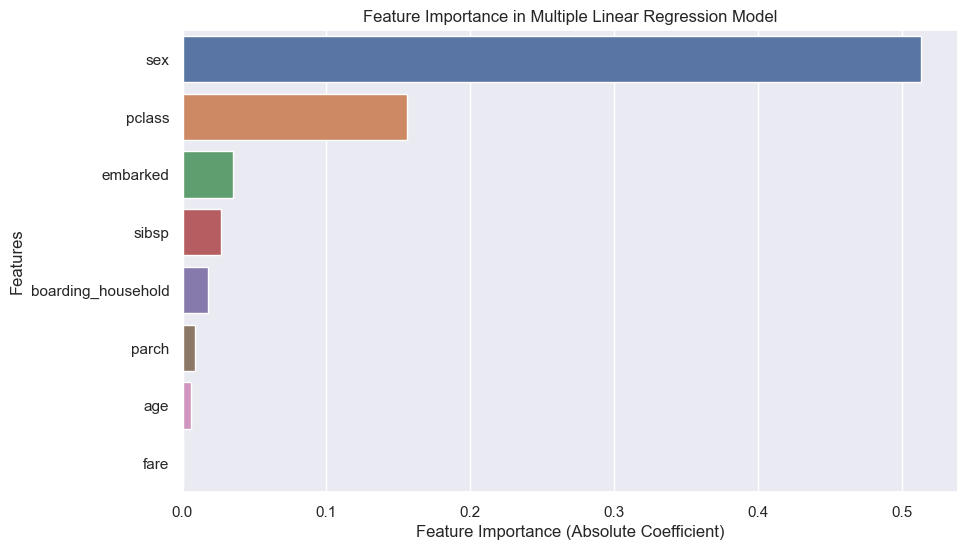

In [124]:
# 各特徴の重要度（係数の絶対値）を取得
feature_importance = abs(model.coef_)

# 重要度を降順にソートしてインデックスを取得
sorted_indices = np.argsort(feature_importance)[::-1]

# 特徴の重要度を降順にソート
sorted_importance = feature_importance[sorted_indices]

# 特徴の名前を降順にソート
sorted_features = X.columns[sorted_indices]

# 特徴の重要度を可視化
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importance, y=sorted_features)
plt.xlabel('Feature Importance (Absolute Coefficient)')
plt.ylabel('Features')
plt.title('Feature Importance in Multiple Linear Regression Model')
plt.show()

数値で見ることもできます。

In [125]:
# 各特徴の係数を取得
coefficients = pd.Series(model.coef_, index=X.columns)

# 結果を表示
print("各特徴の係数:")
print(coefficients)

各特徴の係数:
pclass               -0.156043
sex                   0.513273
age                  -0.005826
sibsp                -0.026619
parch                 0.008630
fare                  0.000244
embarked             -0.035353
boarding_household   -0.017989
dtype: float64


<br>このスコアが良いか悪いかを評価しなければいけません。<br>今回の評価指標はAccuracyでした。<br>0-1の値を取り、1に近づくほど良いスコアということができます。<br>0.7775は良さそうですが、どれくらい良いと言えるのでしょうか？<br>また、この値はたまたまなのか、汎用性はあるのかという懸念点があります。

まず、スコアの評価ですが、適当に予測したものよりも良い値でなければ、それは意味がないものとなります。<br>仮に、全て0で予測をして提出をします。<br>そのスコアが0.775を超えている場合は、私たちが作成したモデルよりも良いという評価ができます。<br>皆さんも、一度予測値を全て1にして提出をしてみてください。

In [62]:
# 予測値を全て1にして提出をします
sample_submission['survived'] = 0
sample_submission.head()

,ID,survived
0,2,0
1,6,0
2,9,0
3,11,0
4,15,0


結果は、0.6233でした。<br>つまり、今回は私たちが作成したモデルの方が良いと言えます。<br>機械学習モデルで予測する意味があるということです。<br>適当に(簡易に)
予測したものをベースラインモデルと呼びます。<br>ベースラインモデルの作り方はアルゴリズムを使わない単純なものでも構いません。<br>多数の値や平均値などで作成します。<br>他の機械学習の問題でも、このベースラインモデルを必ず作って、そのスコアを超えられるようにしましょう。

### 簡易モデル
説明変数1個で簡易モデルを作成してみます。

In [12]:
import numpy as np
import pandas as pd

# データの読み込み
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
sample_submission = pd.read_csv("./submission.csv")

# "ID"をindexとして指定します
train = train.set_index("ID")
test = test.set_index("ID")

# sex
# 0と1の数値データに置き換える
train['sex'].replace({"male": 0, "female": 1}, inplace=True)
test['sex'].replace({"male": 0, "female": 1}, inplace=True)

# 説明変数を設定します
X = train[['sex']]
# 目的変数に"survived"を指定します
y = train['survived']

# testの説明変数を設定します
test = test[['sex']]

# 重回帰モデル構築
from sklearn.linear_model import LinearRegression

# 重回帰モデルを作成
model = LinearRegression()

# モデルの学習
model.fit(X, y)

LinearRegression()

In [13]:
pred = model.predict(test)
pred

array([0.75324675, 0.19221968, 0.75324675, 0.75324675, 0.75324675,
       0.75324675, 0.19221968, 0.19221968, 0.75324675, 0.19221968,
       0.19221968, 0.75324675, 0.75324675, 0.19221968, 0.19221968,
       0.19221968, 0.19221968, 0.19221968, 0.19221968, 0.19221968,
       0.19221968, 0.75324675, 0.75324675, 0.19221968, 0.19221968,
       0.19221968, 0.75324675, 0.19221968, 0.75324675, 0.75324675,
       0.75324675, 0.19221968, 0.19221968, 0.19221968, 0.75324675,
       0.19221968, 0.19221968, 0.75324675, 0.75324675, 0.19221968,
       0.19221968, 0.19221968, 0.19221968, 0.19221968, 0.19221968,
       0.19221968, 0.19221968, 0.19221968, 0.75324675, 0.19221968,
       0.75324675, 0.19221968, 0.19221968, 0.19221968, 0.75324675,
       0.75324675, 0.19221968, 0.75324675, 0.19221968, 0.75324675,
       0.19221968, 0.75324675, 0.19221968, 0.19221968, 0.19221968,
       0.19221968, 0.75324675, 0.19221968, 0.19221968, 0.75324675,
       0.19221968, 0.19221968, 0.75324675, 0.19221968, 0.75324

In [14]:
# 予測する列に予測値を代入します
sample_submission['survived'] = pred

# 閾値0.5で0と1に振り分けます
sample_submission['survived'] = sample_submission['survived'].apply(lambda x: 1 if x >= 0.5 else 0)

# csvの出力
# index列は必要がないので、Falseを指定します
sample_submission.to_csv('submission.csv', index=False)

スコアは**0.78027**でした。<br>説明変数1個だけでも良いスコアが出ています。<br>これを越えらるようにしたいですね。

スコアを上げるために、より深くEDA(探索的データ分析)や特徴量生成を行います。<br>さらに、他のモデルの検討もするでしょう。<br>しかし、機械学習モデルを使って出したスコアが偶然なのか否かをわかる必要があります。<br>モデルの性能について保証ができなければ実務でも活用することはできません。<br>そのために、事前に自分の手元でモデルの性能を評価する、検証するということが必要です。

代表的な検証方法にホールドアウト法(トレーニングデータとテストデータの分割する方法)があります。<br>

ホールドアウト法:<br>
データセットをトレーニングデータとテストデータに分割します。<br>トレーニングデータはモデルの学習に使用され、テストデータは学習後のモデルの性能評価に使われます。<br>一般的な割合は、トレーニングデータが全体の70〜80%、テストデータが残りの20〜30%です。

トレーニングデータとテストデータに分割をして検証をする方法を試してみましょう。

In [144]:
X

,survived,sex
ID,,
1,0,0
3,1,1
4,1,1
5,0,0
7,0,0
...,...,...
885,0,0
886,0,1
887,0,0


In [150]:
from sklearn.model_selection import train_test_split

# データをトレーニングデータとテストデータに分割
# test_sizeでテストデータの割合を指定できます（例えば0.2なら20%がテストデータになります）

'''
X: 特徴量（入力データ）の配列や行列を指定します。
y: ラベル（ターゲット）の配列を指定します。
test_size: テストデータの割合を浮動小数点数で指定します（0.0から1.0の範囲）。
random_state: 乱数のシードを指定します。同じ値を使うと、再現性が保たれます。
shuffle: データをシャッフルするかどうかを指定します。デフォルトはTrueで、データがシャッフルされます。
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# 分割結果を確認
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))
print("X_train:", X_train)
print("y_train:", y_train)
print("X_test:", X_test)
print("y_test:", y_test)

532 532
134 134
X_train:      pclass  sex   age  sibsp  parch     fare  embarked  boarding_household
ID                                                                         
315       2    0  43.0      1      1  26.2500         2                   3
537       1    0  45.0      0      0  26.5500         2                   1
372       3    0  18.0      1      0   6.4958         2                   2
85        2    1  17.0      0      0  10.5000         2                   1
188       1    0  45.0      0      0  26.5500         2                   1
..      ...  ...   ...    ...    ...      ...       ...                 ...
96        3    0  29.9      0      0   8.0500         2                   1
136       2    0  23.0      0      0  15.0458         0                   1
362       2    0  29.0      1      0  27.7208         0                   2
583       2    0  54.0      0      0  26.0000         2                   1
132       3    0  20.0      0      0   7.0500         2        

In [152]:
y_test

ID
826    0
206    0
852    0
316    1
689    0
      ..
722    0
559    1
621    0
278    0
25     0
Name: survived, Length: 134, dtype: int64

sklearnのaccuracy_scoreを使って、モデルの性能を評価します

In [153]:
from sklearn.metrics import accuracy_score

model = LinearRegression()
model.fit(X_train, y_train)

# テストデータを使って予測
y_pred = model.predict(X_test)

In [154]:
y_pred

array([ 0.16939989,  0.76970198, -0.14327793,  0.63625298,  0.19116619,
        0.21695693,  0.10617953,  0.02785955,  0.16442078,  0.60399686,
        0.07173324,  0.86485808,  0.30086364,  0.97842503,  0.52277059,
        0.1201242 ,  0.11271256,  0.03877147,  0.1314506 ,  0.81606937,
        0.203261  ,  0.35135113,  0.52052898,  0.16948284,  0.16793474,
        0.67402935,  0.59695456,  0.0740063 , -0.0059205 ,  0.50510299,
        0.32891879,  0.12010787,  0.17325584, -0.03033027,  0.92856807,
        0.20037847,  0.31092349,  0.01791526,  0.63124956,  0.43594177,
        0.56010488,  0.74617748,  0.72745305,  0.12003948,  0.79788812,
        0.1694846 ,  1.0562406 ,  0.03718323,  0.12010787,  0.84741091,
        0.13750837,  0.93068824, -0.01705102,  0.18843412,  0.131455  ,
        0.65062264,  0.17324745,  0.18436851,  0.21882119,  0.32294662,
        0.16721968,  0.4230375 ,  0.87456901,  0.28737828,  0.94248809,
        0.14928197,  0.42625156,  0.87445253,  0.47026064,  0.17

In [155]:
# 閾値0.5を使って0または1に振り分け
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [158]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1])

In [157]:
y_test.to_numpy()

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0])

In [159]:
# Accuracyスコアの計算
accuracy = accuracy_score(y_test.to_numpy(), y_pred)
print('Accuracy score:', accuracy)

Accuracy score: 0.8283582089552238


In [160]:
# modelを使って予測
pred = model.predict(test)

# 提出用のデータを読み込みます
sample_submission = pd.read_csv("./sample_submission.csv")
# 予測する列に予測値を代入します
sample_submission['survived'] = pred
# 閾値0.5で0と1に振り分けます
sample_submission['survived'] = sample_submission['survived'].apply(lambda x: 1 if x >= 0.5 else 0)
sample_submission.head()

# csvの出力
# index列は必要がないので、Falseを指定します
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head()

,ID,survived
0,2,1
1,6,0
2,9,1
3,11,1
4,15,1


モデルの性能を評価するとAccuracyは0.82835でした。<br>このモデルを使って、提出すると0.78923でした。<br>これは誤差の範囲が大きいので、モデルは過学習をしていると言えるでしょう。

下記によく使う評価指標の計算方法を書いておきます

In [161]:
# 誤差の二乗平均の平方根(RMSE)の計算
# 値が0に近づくほど良いです
import numpy as np
from sklearn.metrics import mean_squared_error

## 予測値と実際の値（サンプルデータとしてランダムに生成）
y_train = np.array([2.0, 2.8, 4.0, 4.9, 5.2])
y_pred = np.array([2.5, 3.0, 4.2, 5.1, 4.9])

## RMSEの計算
rmse = np.sqrt(mean_squared_error(y_train, y_pred))

print("RMSE:", rmse)

RMSE: 0.30331501776206193


In [67]:
# 正解率(Accuracy)
# 値が1に近づくほど良いです
from sklearn.metrics import accuracy_score

## サンプルデータ（実際の値と予測値を示す）
y_train = [1, 0, 1, 1, 0, 1]
y_pred = [1, 1, 0, 1, 0, 0]

## accuracyの計算
accuracy = accuracy_score(y_train, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.5


In [68]:
# 適合率（Precision）と再現率（Recall）、F1スコア
# 値が1に近づくほど良いです
from sklearn.metrics import precision_score, recall_score, f1_score

# サンプルデータ（実際の値と予測値を示す）
y_train = [1, 0, 1, 1, 0, 1]
y_pred = [1, 1, 0, 1, 0, 0]

# 適合率、再現率、F1スコアの計算
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

print("適合率:", precision)
print("再現率:", recall)
print("F1スコア:", f1)

適合率: 0.6666666666666666
再現率: 0.5
F1スコア: 0.5714285714285715


適合率と再現率はトレードオフの関係にあるため、特定の目的や問題に応じてどちらを重視するかを決定する必要があります。<br>例えば、陽性サンプルを見逃すことが許容されない医療診断の場合は再現率が重要ですが、<br>陽性と予測されたサンプルの中に誤った予測が少ないことが重要な場合は適合率が重要になります。<br>F1スコアは、適合率と再現率の両方を考慮し、バランスの取れたモデルの評価を行います。

今回のタイタニックの課題で解説した他に、モデルの性能を上げる方法としては、<br>決定木や勾配ブースティングやニューラルネットワークを使用する、ハイパーパラメータを調整する、アンサンブル学習するなどがあります。<br>無意識のうちにモデルや手法で精度を上げることばかり気にするようになると危険信号です。<br>EDAや特徴量エンジニアリングでできることは無いか何度も熟考しましょう。<br>そもそものデータと向き合うことが一番大切です。<br>その後は他のモデルにも取り組んでみましょう。

特徴量作成のアイディアには
[機械学習プチインプット動画](https://kinoquest.jp/main/limited_video/)もぜひ、ご視聴くださいませ。<br>

まず初めにおすすめのプチインプット動画
1. データ分析の基本の流れ
2. 機械学習の学習ロードマップ
3. 様々な評価指標とその使い分けについて
4. 機械学習の理論を理解するために必要な知識
5. 機械学習モデルの現場のユースケースの紹介
6. 機械学習におすすめの書籍（機械学習理論編）
7. 機械学習におすすめの書籍（統計学編）
8. 機械学習におすすめの書籍（数学編）

### 謝辞

お疲れ様でした。<br>ここまで読んでいただき、ありがとうございます。<br>タイタニックのデータセットを用いて、機械学習の基本的なフローを一緒に学んできました。<br>データの取得からEDA(探索的データ分析)、特徴量エンジニアリング、そしてモデルの作成・評価といった一連のステップは、どんなデータを扱う場合でも共通して必要となる作業です。

学びを通じて、機械学習がただモデルを適用するだけでなく、データの理解、結果の解釈というどれも重要なステップがあることを理解いただけたら幸いです。<br>また、各特徴量がどのように目的変数に影響を与えるかを理解することで、データに対する深い洞察が得られるはずです。

今回作成したモデルは、あくまで一例に過ぎません。<br>より精度の高いモデルを作成するためには、さまざまな特徴量エンジニアリングのテクニックや、他の機械学習モデルの導入も考えられます。<br>この経験を活かしてとして、自分自身で新たな試みを行ってみてください。<br>

このチュートリアルは、機械学習の旅の始まりにすぎません。<br>他の実践問題、Kaggleなどのコンペに参加することで新しい問題に挑戦し、更なる知識と経験を積み上げていきましょう。<br>

この解説が皆様の最高のスタートとなることを願って作成をいたしました。<br>
学習の一助となりましたら幸いです。<br>
そして、再び新たな学びの場でお会いできることを、心より楽しみにしております。<br>
それでは、これからも機械学習の学びを続け、その可能性を追求し続けてください。<br>
ありがとうございました。